In [1]:
import os, subprocess
import json
import uproot
import awkward as ak
import numpy as np
from coffea import processor, util, hist

%matplotlib inline
import matplotlib.pyplot as plt

from coffea.nanoaod import NanoEvents
from boostedhiggs import HbbProcessor, BTagEfficiency

In [2]:
year = '2017'
sample = 'QCD'
this_file = 'infiles/'+year+'_'+sample+'.json'

In [3]:
p = HbbProcessor(year=year)
args = {'nano': True, 'workers': 4, 'savemetrics': True}
out, metrics = processor.run_uproot_job(this_file, 'Events', p, processor.futures_executor, args, chunksize=50000, maxchunks=2)

/uscms/home/jennetd/.local/lib/python3.6/site-packages/uproot_methods/classes/TLorentzVector.py:189: RuntimeWarning: invalid value encountered in sqrt
  return self._trymemo("mass", lambda self: self.awkward.numpy.sqrt(self.mag2))
/uscms/home/jennetd/.local/lib/python3.6/site-packages/awkward/array/jagged.py:1043: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/uscms/home/jennetd/.local/lib/python3.6/site-packages/uproot_methods/classes/TLorentzVector.py:189: RuntimeWarning: invalid value encountered in sqrt
  return self._trymemo("mass", lambda self: self.awkward.numpy.sqrt(self.mag2))
/uscms/home/jennetd/.local/lib/python3.6/site-packages/awkward/array/jagged.py:1043: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/uscms/home/jennetd/.local/lib/python3.6/site-packages/awkward/array/jagged.py:1043: RuntimeWarning: invalid value encountered in greater_equal
  result = getattr

In [4]:
with open('xsec.json') as f:
  xs = json.load(f)

scale1fb = {k: xs[k] * 1000 / w for k, w in out['sumw'].items()}

In [5]:
out['templates1'].scale(scale1fb, 'dataset')
out['templates2'].scale(scale1fb, 'dataset')
out['templates3'].scale(scale1fb, 'dataset')
out['templates4'].scale(scale1fb, 'dataset')

In [6]:
pmap = {}
pmap['QCD'] = list(xs.keys())

In [7]:
templates1 = out['templates1'].group('dataset', hist.Cat('process', 'Process'), pmap)
templates2 = out['templates2'].group('dataset', hist.Cat('process', 'Process'), pmap)
templates3 = out['templates3'].group('dataset', hist.Cat('process', 'Process'), pmap)
templates4 = out['templates4'].group('dataset', hist.Cat('process', 'Process'), pmap)

/uscms/home/jennetd/.local/lib/python3.6/site-packages/coffea/hist/hist_tools.py:346: RuntimeWarning: Not all requested indices present in <Cat (name=dataset) instance at 0x7f860c4d79b0>
  warnings.warn("Not all requested indices present in %r" % self, RuntimeWarning)
/uscms/home/jennetd/.local/lib/python3.6/site-packages/coffea/hist/hist_tools.py:346: RuntimeWarning: Not all requested indices present in <Cat (name=dataset) instance at 0x7f860c4d7a20>
  warnings.warn("Not all requested indices present in %r" % self, RuntimeWarning)
/uscms/home/jennetd/.local/lib/python3.6/site-packages/coffea/hist/hist_tools.py:346: RuntimeWarning: Not all requested indices present in <Cat (name=dataset) instance at 0x7f860cebe160>
  warnings.warn("Not all requested indices present in %r" % self, RuntimeWarning)
/uscms/home/jennetd/.local/lib/python3.6/site-packages/coffea/hist/hist_tools.py:346: RuntimeWarning: Not all requested indices present in <Cat (name=dataset) instance at 0x7f860b416240>
  warn

(1, 1000000)

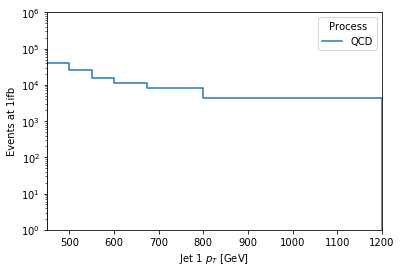

In [8]:
x = templates1.integrate('region', 'signal').sum('n2ddt1', 'ddb1', 'msd1')
x.label = 'Events at 1ifb'
axes = hist.plotgrid(x, overlay='process', line_opts={})
axes[0, 0].set_yscale('log')
axes[0, 0].set_ylim(1, 1000000)

(1, 1000000)

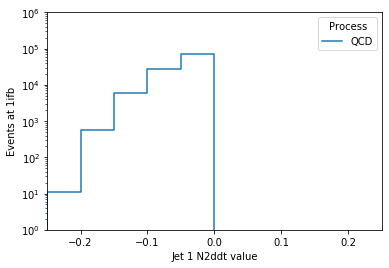

In [9]:
x = templates1.integrate('region', 'signal').sum('pt1', 'ddb1', 'msd1')
x.label = 'Events at 1ifb'
axes = hist.plotgrid(x, overlay='process', line_opts={})
axes[0, 0].set_yscale('log')
axes[0, 0].set_ylim(1, 1000000)

(1, 1000000)

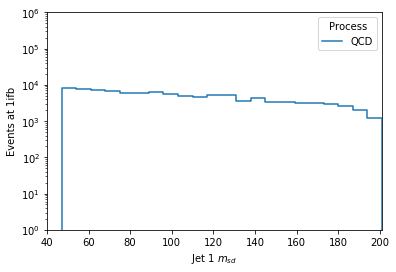

In [10]:
x = templates1.integrate('region', 'signal').sum('pt1', 'n2ddt1', 'ddb1')
x.label = 'Events at 1ifb'
axes = hist.plotgrid(x, overlay='process', line_opts={})
axes[0, 0].set_yscale('log')
axes[0, 0].set_ylim(1, 1000000)

(1, 1000000)

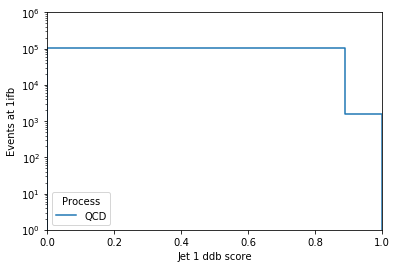

In [11]:
x = templates1.integrate('region', 'signal').sum('pt1', 'n2ddt1', 'msd1')
x.label = 'Events at 1ifb'
axes = hist.plotgrid(x, overlay='process', line_opts={})
axes[0, 0].set_yscale('log')
axes[0, 0].set_ylim(1, 1000000)

(1, 1000000)

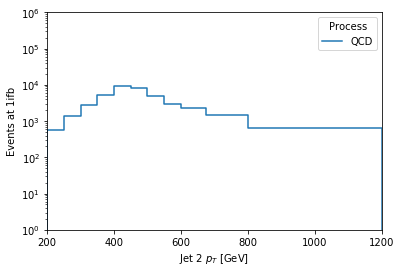

In [12]:
x = templates2.integrate('region', 'signal').sum('n2ddt2', 'ddb2', 'msd2', 'ddb1')
x.label = 'Events at 1ifb'
axes = hist.plotgrid(x, overlay='process', line_opts={})
axes[0, 0].set_yscale('log')
axes[0, 0].set_ylim(1, 1000000)

(1, 1000000)

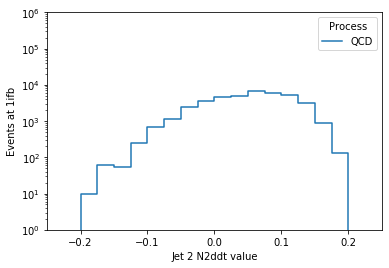

In [13]:
x = templates2.integrate('region', 'signal').sum('pt2', 'ddb2', 'msd2','ddb1')
x.label = 'Events at 1ifb'
axes = hist.plotgrid(x, overlay='process', line_opts={})
axes[0, 0].set_yscale('log')
axes[0, 0].set_ylim(1, 1000000)

(1, 1000000)

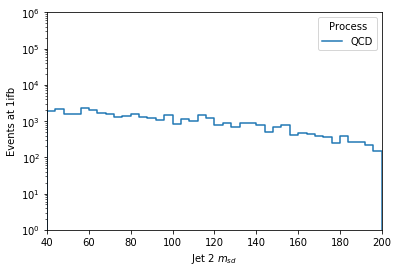

In [14]:
x = templates2.integrate('region', 'signal').sum('pt2', 'n2ddt2', 'ddb2','ddb1')
x.label = 'Events at 1ifb'
axes = hist.plotgrid(x, overlay='process', line_opts={})
axes[0, 0].set_yscale('log')
axes[0, 0].set_ylim(1, 1000000)

(1, 1000000)

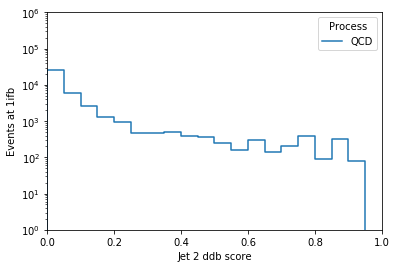

In [15]:
x = templates2.integrate('region', 'signal').sum('pt2', 'n2ddt2', 'msd2','ddb1')
x.label = 'Events at 1ifb'
axes = hist.plotgrid(x, overlay='process', line_opts={})
axes[0, 0].set_yscale('log')
axes[0, 0].set_ylim(1, 1000000)

(1, 1000000)

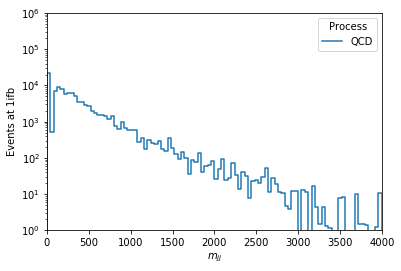

In [16]:
x = templates3.integrate('region', 'signal').sum('deta', 'ddb1','qgl1','qgl2')
x.label = 'Events at 1ifb'
axes = hist.plotgrid(x, overlay='process', line_opts={})
axes[0, 0].set_yscale('log')
axes[0, 0].set_ylim(1, 1000000)

(1, 1000000)

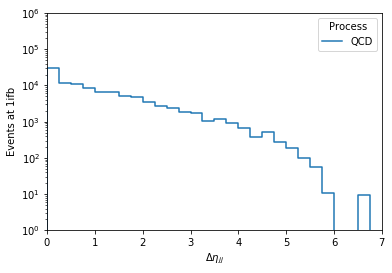

In [17]:
x = templates3.integrate('region', 'signal').sum('mjj','ddb1','qgl1','qgl2')
x.label = 'Events at 1ifb'
axes = hist.plotgrid(x, overlay='process', line_opts={})
axes[0, 0].set_yscale('log')
axes[0, 0].set_ylim(1, 1000000)

(1, 1000000)

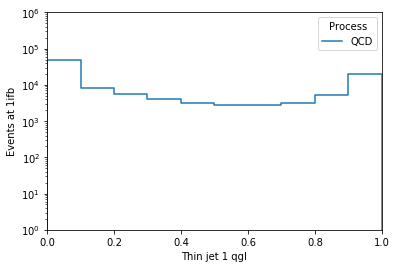

In [18]:
x = templates3.integrate('region', 'signal').sum('mjj','ddb1','deta','qgl2')
x.label = 'Events at 1ifb'
axes = hist.plotgrid(x, overlay='process', line_opts={})
axes[0, 0].set_yscale('log')
axes[0, 0].set_ylim(1, 1000000)

(1, 1000000)

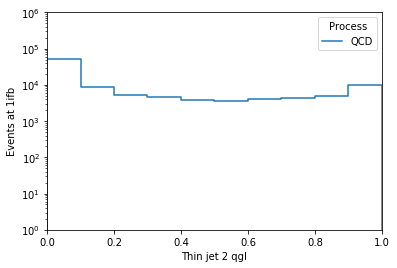

In [19]:
x = templates3.integrate('region', 'signal').sum('mjj','ddb1','deta','qgl1')
x.label = 'Events at 1ifb'
axes = hist.plotgrid(x, overlay='process', line_opts={})
axes[0, 0].set_yscale('log')
axes[0, 0].set_ylim(1, 1000000)

(1, 1000000)

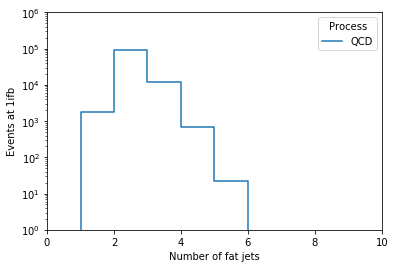

In [20]:
x = templates4.integrate('region', 'signal').sum('njets','ddb1')
x.label = 'Events at 1ifb'
axes = hist.plotgrid(x, overlay='process', line_opts={})
axes[0, 0].set_yscale('log')
axes[0, 0].set_ylim(1, 1000000)

(1, 1000000)

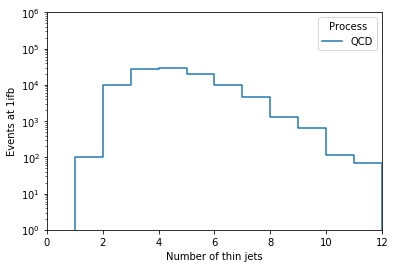

In [21]:
x = templates4.integrate('region', 'signal').sum('nfatjets','ddb1')
x.label = 'Events at 1ifb'
axes = hist.plotgrid(x, overlay='process', line_opts={})
axes[0, 0].set_yscale('log')
axes[0, 0].set_ylim(1, 1000000)

In [22]:
tot1 = templates1.integrate('region', 'signal').sum('pt1', 'msd1', 'n2ddt1').integrate('ddb1',int_range=slice(0.89,1))
tot1.values()

{('QCD',): 1568.735383536367}

In [23]:
tot2 = templates2.integrate('region', 'signal').sum('pt2', 'msd2', 'n2ddt2','ddb2').integrate('ddb1',int_range=slice(0.89,1))
tot2.values()

{('QCD',): 437.6108131112761}

In [24]:
tot3 = templates3.integrate('region', 'signal').sum('qgl1','qgl2','deta','mjj').integrate('ddb1',int_range=slice(0.89,1))
tot3.values()

{('QCD',): 1568.508378536043}

In [25]:
tot4 = templates4.integrate('region', 'signal').sum('njets','nfatjets').integrate('ddb1',int_range=slice(0.89,1))
tot4.values()

{('QCD',): 1568.5108791912746}